In [3]:
import pandas as pd 
import faiss
import pickle
from nltk.tokenize import sent_tokenize
import numpy as np
import glob

In [49]:
def filt(sents):
    ret=[]
    for s in sents:
        if len(s)>15:
            ret.append(s)
    return ret

In [27]:
f = open("desc.txt", "r", encoding="utf-8")
text=f.read()
f.close()
text=text.replace('\r', ' ').replace('\n', ' ')
text=text.split("PREFACE TO THE SECOND EDITION.")[2]
text=text.split("probability to the action of sexual selection.")[0]
text+="probability to the action of sexual selection."
text=text.strip()
dom = filt(sent_tokenize(text))
f = open("oos.txt", "r", encoding="utf-8")
text=f.read()
f.close()
text=text.replace("\n"," ")
text=text.split("Sixth London Edition, with all Additions and Corrections.")[1]
text=text.split("from so simple a beginning endless forms most beautiful and most wonderful have been, and are being evolved.")[0]
text=text.strip()
oos = filt(sent_tokenize(text))


IndexError: list index out of range

In [51]:
id

'biostor-91687'

In [53]:
text=filt(sent_tokenize(text))

In [57]:
new_dom=[]
delete=[]
for i in range(0, len(text)):
    if len(text[i])<45:
        print(text[i])
        delete.append(i)
    else:
        new_dom.append(dom[i])
#emb_dom=np.delete(emb_dom, delete, axis=0)

DISCOURSES BY / JOHN HAMILTON THOM.
— Philippians ii.
JAMES MARTINEAU, LL.D., D.D.
Aptitudes for Discipleship ... ,^ ... 34 IV.
Knowing AND Doing .. , .. ... 97 VIII.
The judging Spirit 2i5 XV.
The Morality of Temper 234' XVI.
Strengthen what remains 281 XIX.
Quiet from God 372 XXV.
10 : " Love is the fulfilling of the Law."
never has been since.
I delight to do Thy will, O my God : yea.
Thy law is within my heart."
y life itself made manifest. "
"As I hear, I speak."
How did it come into existence .
We might become as Christ.
Now that, as a precept, was known before.
That was not known.
The end of Revelation is Life, is Character.
The of God's Love.
If still we are asked.
— we can only answer.
It is the same mystery.
The earth beneath is heaved up, and lo !
24 The Universality of Christianity.
The Universality of CJmstianity.
or what would it matter if they did refuse ?
The guilty did not shun him.
What more can Faith de- mand .
3 7 affections ?
Light streams through the veil.
Nathana

In [28]:
len(dom)

8670

In [6]:
file = open('vec_oos.pickle', 'rb')
emb_oos = pickle.load(file)

In [21]:
file = open('vec_dom.pickle', 'rb')
emb_dom = pickle.load(file)
#

In [22]:
len(emb_dom)

8670

In [23]:
len(new_dom)

8712

In [4]:
bio=pd.read_csv("bio_auth_books.csv")
bio2=pd.read_csv("bio_auth_books2.csv")
bio=pd.concat((bio,bio2),axis=0)

In [10]:
for i in bio.head().itertuples():
    print(i[2])

acanthaceae-in-fl-brit-ind
paper-doi-10_1038_041579a0
paper-doi-10_1098_rspl_1891_0062
paper-doi-10_1098_rstb_1892_0009
biostor-209757


In [10]:
emb_all=np.concatenate([emb_oos,emb_dom])

In [29]:
nlist = 100
m = 8                             # number of subquantizers
k = 4
#quantizer = faiss.IndexFlatL2(384)  # this remains the same

index=faiss.IndexFlatIP(384)
#index = faiss.IndexIVFFlat(quantizer, 384, nlist, m, 8, metric="METRIC_INNER_PRODUCT")
#index = faiss.IndexIVFPQ(quantizer, 384, nlist, m, 8)
#index.train(emb_all)


In [33]:
count=0
book_map=dict()
tot=0
for id in bio["id"]:

    try:
        file = open('bio_vectors/'+id+'.pickle', 'rb')
        emb = pickle.load(file)
        
        for e in range(0,len(emb)):
            book_map[count]=(id,e)
            count+=1
        
        faiss.normalize_L2(emb)
        index.add(emb)
        tot+=1
        if tot%1000==0:
            print(tot)
        if tot>2000:
            break
    except:
        continue
    
    

1000
2000


In [44]:
len(emb_dom)

10024

In [34]:
temp=index.range_search(emb_dom, 0.9)

In [40]:
temp[0]

array([    0,     0,     0, ..., 25128, 25128, 25130], dtype=uint64)

In [46]:
len(temp[0])

10025

In [40]:
k = 5                          # we want to see 4 nearest neighbors
D, I = index.search(emb_dom, k) # sanity check
print(I)
print(D)

[[ 525594  524005  579460  538045  521301]
 [1937376 1378719 1378324 1378079 1377886]
 [ 450135  573090 1362654   49767  638911]
 ...
 [ 799974  428155 1916640 1910288  617835]
 [ 799974  571588  545617  563247  605306]
 [ 496877  480961  804422  799974  391294]]
[[0.8947424  0.8947424  0.8939992  0.8860862  0.8860862 ]
 [0.8837606  0.87744075 0.87744075 0.87744075 0.87744075]
 [0.8936438  0.8930449  0.8927866  0.8902054  0.8890575 ]
 ...
 [0.90159357 0.89501274 0.8902314  0.8862612  0.885239  ]
 [0.89285874 0.8924     0.89116144 0.8863026  0.8849932 ]
 [0.9106339  0.9007335  0.898028   0.8920643  0.88952726]]


In [48]:
len(sents)

7873

In [50]:
lims=temp[0]
D=temp[1]
I=temp[2]
for i in range(0,len(emb_dom)):
    if lims[i+1]-lims[i]>0:
        print(dom[i])
    for j in range(lims[i],lims[i+1]):
        print
        #print(oos[I[i][j]])
        match=book_map[I[j]]
        #matches.append(bio[bio["id"]==match[0]]["title"].iloc[0])
        #dates.append(bio[bio["id"]==match[0]]["date"].iloc[0])

        print("example:"+str(j))


        print(bio[bio["id"]==match[0]]["title"].iloc[0])
        path=glob.glob('clean_bio/'+match[0]+'.txt')
        try:
            f = open(path[0], "r", encoding="utf-8")
            text=f.read()
        except:
            continue
        f.close()
        sents = filt(sent_tokenize(text))
        print(sents[match[1]])
        print()


Some new illustrations have been introduced, and four of the old drawings have been replaced by better ones, done from life by Mr. T.W.
example:0
Supplement to the catalogue of the Public Library of New South Wales, Sydney, Reference Department
New od., illustrated.

example:1
Supplement to the catalogue of the Public Library of New South Wales, Sydney, Reference Department
New od., illustrated.

I must especially call attention to some observations which I owe to the kindness of Prof. Huxley (given as a supplement at the end of Part I.
example:2
Scientific lectures
By Professor HUXLEY, F.R.S., assisted by H. N. Martin, M.B., D.Sc.

example:3
British Wild Flowers
By Prof. Huxley, F.R,S., awivsed i'ly H. N .

example:4
British Wild Flowers
By Prof. Huxley, F.R.S.

example:5
Scientific Lectures
Huxley — PHYSIOGRAPHY.

example:6
Scientific Lectures
By Professor Huxley, F.R.S., assisted by H. N. Martin, M.B., D.Sc.

example:7
Scientific Lectures
By Professor Huxley, F.R.S., assisted by — P

KeyboardInterrupt: 

In [41]:
import glob

In [42]:
matches=[]
dates=[]
for i in range(0, len(D)):
    if (sum(map(str.isupper, dom[i])) / len(dom[i])<0.6):
        if D[i][0]>0.9:
            print("Original:")
            print(dom[i])
            
        for j in range(0, 5):
            if D[i][j]>0.9:
                #print(oos[I[i][j]])
                match=book_map[I[i][j]]
                #matches.append(bio[bio["id"]==match[0]]["title"].iloc[0])
                #dates.append(bio[bio["id"]==match[0]]["date"].iloc[0])

                print("example:"+str(j))
                

                print(bio[bio["id"]==match[0]]["title"].iloc[0])
                path=glob.glob('clean_bio/'+match[0]+'.txt')
                try:
                    f = open(path[0], "r", encoding="utf-8")
                    text=f.read()
                except:
                    continue
                f.close()
                sents = filt(sent_tokenize(text))
                print(sents[match[1]])
                print()


Original:
Some new illustrations have been introduced, and four of the old drawings have been replaced by better ones, done from life by Mr. T.W.
example:0
Supplement to the catalogue of the Public Library of New South Wales, Sydney, Reference Department
New od., illustrated.

example:1
Supplement to the catalogue of the Public Library of New South Wales, Sydney, Reference Department
New od., illustrated.

Original:
I must especially call attention to some observations which I owe to the kindness of Prof. Huxley (given as a supplement at the end of Part I.
example:0
British Wild Flowers
By Prof. Huxley, F.R.S.

example:1
British Wild Flowers
By Prof. Huxley, F.R,S., awivsed i'ly H. N .

example:2
Scientific Lectures
Huxley — PHYSIOGRAPHY.

example:3
Flowers, Fruits, And Leaves.
By Professor HuxLEY, F.R.S.

example:4
The Beauties Of Nature
BY PROFESSOR HUXLEY, F.R.S.

Original:
DOWN, BECKENHAM, KENT, September, 1874.
example:0
British Wild Flowers
IIiGii Elms, Down, Kent, September^ 187

38) the case is very different.

example:1
Flowers, Fruits and Leaves
38) the case is very different.

example:2
Flowers, Fruits and Leaves
38) the case is very different.

example:3
Chapters in Popular Natural History
65) the case is very different.

example:4
Official report of the National Australasian Convention debates : Sydney, 2 March to 9 April, 1891
Then there is another aspect of the case.

Original:
When a naturalist like Carl Vogt ventures to say in his address as President of the National Institution of Geneva (1869), “personne, en Europe au moins, n’ose plus soutenir la creation indépendante et de toutes pièces, des espèces,” it is manifest that at least a large number of naturalists must admit that species are the modified descendants of other species; and this especially holds good with the younger and rising naturalists.
example:0
Origin And Metamorphoses Of Insects
“ Personne,” says Carl Vogt, ** en Europe au moins, n’ose plus soutenir la Creation ind^pendante et de t

The Brain as an Organ of Mind.

example:4
Ants, bees, and wasps. A record of observations on the habits of the social Hymenoptera
THE BRAIN AS AN ORGAN OF MIND.

Original:
‘Grosshirnwindungen des Menschen,’ 1868, s. 96.
example:0
Handwörterbuch der Zoologie
Menschenrassen, s. Mensch.

example:1
A revision of the Oriental Hesperiidae
Wien, 1868, p. 284.

example:2
A revision of the Oriental Hesperiidae
Wien, 1868, p. 284.

Original:
The conclusions of this author, as well as those of Gratiolet and Aeby, concerning the brain, will be discussed by Prof. Huxley in the Appendix alluded to in the Preface to this edition.
example:0
British Wild Flowers
By Prof. Huxley, F.R,S., awivsed i'ly H. N .

example:1
Supplement to the catalogue of the Public Library of New South Wales, Sydney, Reference Department
C 13 P 14 HUXLEY, Et.

example:2
Supplement to the catalogue of the Public Library of New South Wales, Sydney, Reference Department
C 13 P 14 HUXLEY, Et.

example:3
British Wild Flowers
By Pr

Printed in Silliman's American Journal of Science, vol.

example:1
Mémoires et souvenirs de AugustinPyramus de Candolle
Printed in Silliman's American Journal of Science, vol.

example:2
Catalogue of the described species of North American Hymenoptera. (Continued.)
Silliman’s American Journal of Science, 2nd ser.

example:3
Catalogue of the described species of North American Hymenoptera. (Continued.)
Silliman's American Journal of Science, 2nd ser.

Original:
Hereafter I shall return to this subject.
example:0
XXI.—Notes on the freshwater Infusoria of the Island of Bombay. No. 1. organization
I shall have to recur to these facts more particularly hereafter.

example:1
Outlines of the history of freemasonry in the province of Quebec [microform]
f)n this subject, for on my return to I'aigland, which I hope will be in 179,4 or 1795.

example:2
The Entomologist's Weekly Intelligencer
I shall "try again."

Original:
I have given the evidence on this head in my ‘Variation of Animals and Pla

Calyx coriaceous.

example:2
Chapters in Popular Natural History
belonging to the tail.

example:3
The Flora Of British India Vol 1
Calyx lO-nerved.

example:4
The Flora Of British India Vol 1
Calyx lO-nerved.

Original:
Man is developed from an ovule, about the 125th of an inch in diameter, which differs in no respect from the ovules of other animals.
example:0
X.—Descriptions of sponges from the neighbourhood of Port Phillip Heads, South Australia
in diameter, like ovules.

example:1
XXI.—Notes on the freshwater Infusoria of the Island of Bombay. No. 1. organization
Ovule about 1 -4000th of an inch in diameter.

example:2
XXI.—Notes on the freshwater Infusoria of the Island of Bombay. No. 1. organization
Development of the Ovule .

example:3
XIV.—Notes on the freshwater Infusoria of the Island of Bombay. No. 1. Organization
Development of Ovule .

Original:
1), marking their former position.
example:0
Campophagae
They are marked »P.

Original:
‘Man’s Place in Nature,’ 1863, p.
exampl

KeyboardInterrupt: 

In [90]:
from collections import Counter

In [91]:
Counter(matches)

Counter({'From the Greeks to Darwin; an outline of the development of the evolution idea': 27,
         'From the Greeks to Darwin; an outline of the development of the evolution idea;': 19,
         'Science For All': 14,
         'From the Greeks to Darwin: an outline of the development of the evolution idea': 10,
         'Science For All Vol 3': 10,
         'the pleasures of life': 8,
         'Report of the Royal commission on Chinese immigration. Report and evidence': 7,
         'The Geological Evidences of the Antiquity of Man: With Remarks on Theories of the Origin of Species by Variation (Google eBook)': 7,
         'The geological evidences of the antiquity of man with remarks on theories of the origin of species by variation: Illustrated by woodcuts (Google eBook)': 6,
         'The Coming of Age of the Origin of Species 1': 6,
         'On the Anatomy, Classification, and Distribution of the Arctoidea': 5,
         "The monstrous Begonia frigida at Kew, in relation to Mr.

In [92]:
dates

[1894,
 1894,
 1894,
 1894,
 1894,
 1884,
 1884,
 1859,
 1857,
 1857,
 1826,
 1826,
 1884,
 1884,
 1884,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1894,
 1853,
 1889,
 1853,
 1889,
 1885,
 1888,
 1895,
 1885,
 1885,
 1885,
 1885,
 1882,
 1888,
 1889,
 1890,
 1883,
 1883,
 1874,
 1892,
 1892,
 1845,
 1875,
 1875,
 1896,
 1896,
 1896,
 1896,
 1885,
 1885,
 1885,
 1885,
 1885,
 1885,
 1885,
 1885,
 1885,
 1885,
 1883,
 1883,
 1891,
 1894,
 1894,
 1894,
 1894,
 1894,
 1891,
 1887,
 1887,
 1888,
 1891,
 1891,
 1891,
 1887,
 1891,
 1886,
 1881,
 1881,
 1892,
 1892,
 1863,
 1863,
 1863,
 1863,
 1863,
 1863,
 1863,
 1863,
 1863,
 1863,
 1869,
 1856,
 1856,
 1856,
 1856,
 1856,
 1856,
 1881,
 1881,
 1856,
 1856,
 1881,
 1881,
 1881,
 1856,
 1881,
 1856,
 1856,
 1856,
 1881,
 1881,
 1856,
 1856,
 1881,

In [98]:
len(set(matches))

70

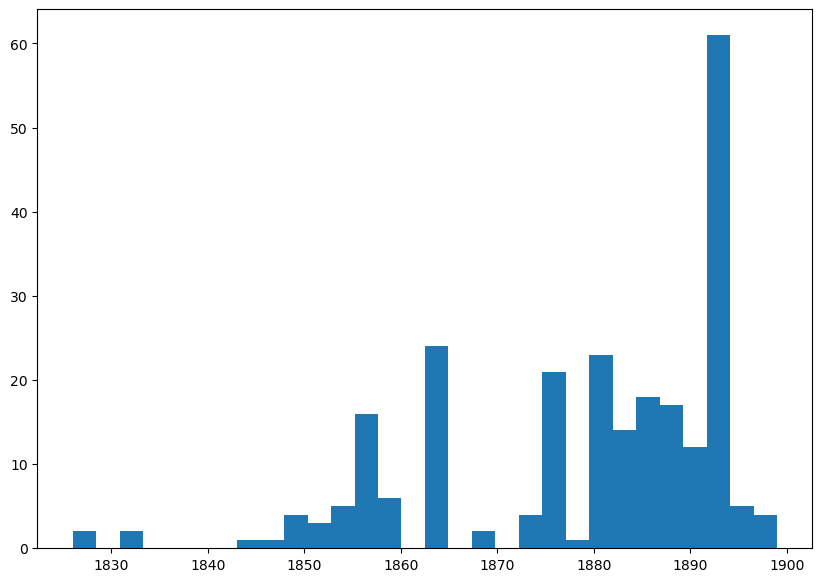

In [97]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dates, bins=30)
 
# Show plot
plt.show()

In [ ]:
f = open("clean_bio"+, "r", encoding="utf-8")
text=f.read()
f.close()
text=text.replace('\r', ' ').replace('\n', ' ')
text=text.split("PREFACE TO THE SECOND EDITION.")[2]
text=text.split("probability to the action of sexual selection.")[0]
text+="probability to the action of sexual selection."
text=text.strip()
dom = filt(sent_tokenize(text))